In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [125]:
data = pd.read_csv('3.01. Country Clusters.csv')

In [126]:
data

Country  Latitude  Longitude Language
0        USA     44.97    -103.77  English
1     Canada     62.40     -96.80  English
2     France     46.75       2.40   French
3         UK     54.01      -2.53  English
4    Germany     51.15      10.40   German
5  Australia    -25.45     133.11  English

# plotting the data in the graph as scatter ploot

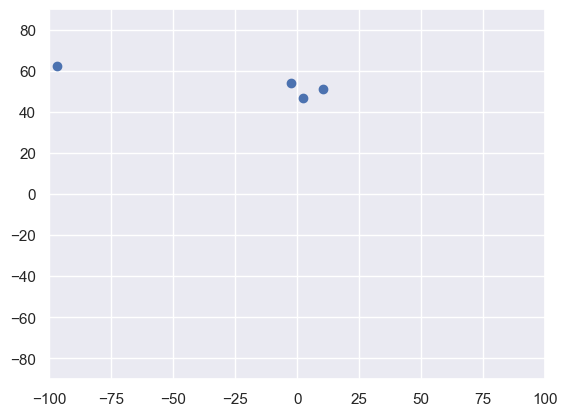

In [127]:
plt.scatter(data['Longitude'],data['Latitude']) # plotting longitude and latitude of countries
plt.xlim(-100,100) # then giving general longitude and latitude maximum limit 
plt.ylim(-90,90)
plt.show()
# see the country coordinate is placed like it is in world map-

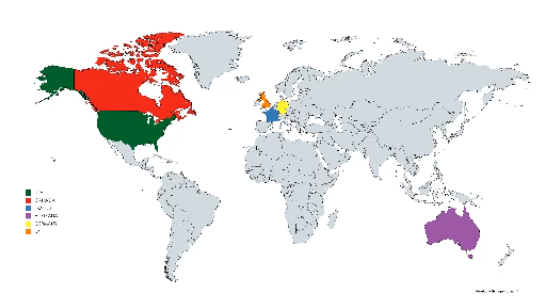

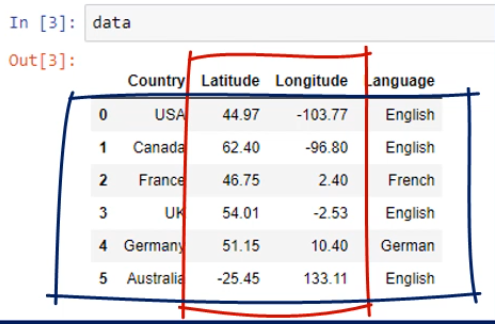
# selecting these data only middle two columns see down


# Selection of features 

In [128]:
# inoc method of pandas selects rows and colums in the datasetr
# basically all the data as : and slicing out first and last leaving middle two red color marked data only
# no limits for rows but slice out others from data
x = data.iloc[:,1:3]

In [129]:
x

Latitude  Longitude
0     44.97    -103.77
1     62.40     -96.80
2     46.75       2.40
3     54.01      -2.53
4     51.15      10.40
5    -25.45     133.11

In [130]:
#  k means clustering with two clusters
k_means = KMeans(4)

In [131]:
k_means.fit(x)

KMeans(n_clusters=4)

In [132]:
# clustering results
identified_clusters = k_means.fit_predict(x)
identified_clusters

array([3, 0, 1, 1, 1, 2], dtype=int32)

In [133]:
# first 1, 1 represent US and canada others being at another cluster or 0th cluster

In [134]:
data_with_clusters = data.copy()

In [135]:
# appending wnoter feature to the dataset
data_with_clusters['Cluster'] = identified_clusters

In [136]:
data_with_clusters

Country  Latitude  Longitude Language  Cluster
0        USA     44.97    -103.77  English        3
1     Canada     62.40     -96.80  English        0
2     France     46.75       2.40   French        1
3         UK     54.01      -2.53  English        1
4    Germany     51.15      10.40   German        1
5  Australia    -25.45     133.11  English        2

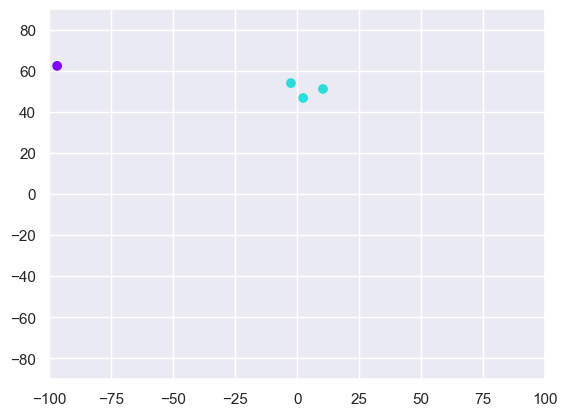

In [137]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-100,100)
plt.ylim(-90,90)
plt.show()
# the only two colo inspite of four clusters is because there is overlapping of datapoints

# now we have to utilize another feature from dataset a official language

In [140]:
data_with_clusters

Country  Latitude  Longitude Language  Cluster
0        USA     44.97    -103.77  English        3
1     Canada     62.40     -96.80  English        0
2     France     46.75       2.40   French        1
3         UK     54.01      -2.53  English        1
4    Germany     51.15      10.40   German        1
5  Australia    -25.45     133.11  English        2

In [141]:
new_data = data_with_clusters.copy()

In [142]:
# as i have already said this in the previous day 2 or 3 this is not optimal way to incode but we should ve use 
#  english germany french
#    0      0       1
#    1      0       0

new_data['Language'] = new_data['Language'].map({'English': 0, 'French': 1, 'German': 2})

In [143]:
new_data

Country  Latitude  Longitude  Language  Cluster
0        USA     44.97    -103.77         0        3
1     Canada     62.40     -96.80         0        0
2     France     46.75       2.40         1        1
3         UK     54.01      -2.53         0        1
4    Germany     51.15      10.40         2        1
5  Australia    -25.45     133.11         0        2

In [144]:
# 3 inclusive 4 exclusive
x_lang = new_data.iloc[:,3:4]

In [145]:
x_lang

Language
0         0
1         0
2         1
3         0
4         2
5         0

In [150]:
k_means_language = KMeans(2)

In [154]:
k_means_language.fit(x_lang)

KMeans(n_clusters=2)

In [155]:
# clustering results
identified_clusters = k_means.fit_predict(x_lang)
identified_clusters


C:\Users\Rustam Shrestha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


array([0, 0, 2, 0, 1, 0], dtype=int32)

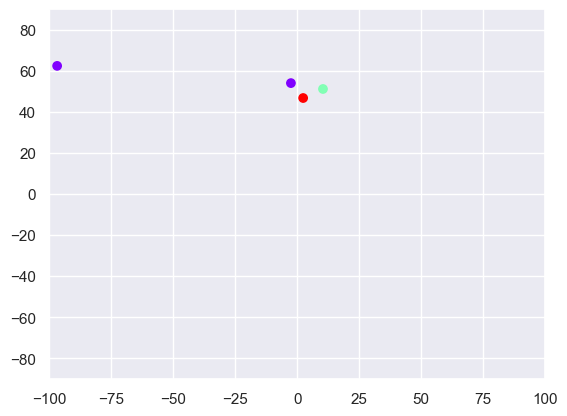

In [156]:
data_with_clusters = data.copy()
# appending wnoter feature to the dataset
data_with_clusters['Cluster'] = identified_clusters
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-100,100)
plt.ylim(-90,90)
plt.show()
# the only two colo inspite of four clusters is because there is overlapping of datapoints